# problem description

_The approach might be useful for those working on data collected over sub-linear profiles, e.g. for planning or implementation purposes..._

for Site D: 

profiles parallel to the main one at distace (perpendicular to the mean direction): 
```
meters:
-40, -30, -20, -10, +10, +20, +30, +40
 ```
 
for Site E
 
profiles parallel to the main one at distace (perpendicular to the mean direction): 

```
meters:
-20, -15, -10, -5, +5, +10, +15, +20
```
 
 

# change of CRS (done with ogr2ogr)

original projection:

```
+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs
```

desired projection:

```
+proj=utm +zone=28 +north +ellps=GRS80 +datum=GRS80 +units=m +no_defs
```

In [1]:
# files as WGS84 geographic, as exported from RTK processing

input_raw_D = './0_location-profiles-RAW/AGPA-G_D2.shp'
input_raw_E = './0_location-profiles-RAW/AGPA-E.shp'
output_UTM_D = './1_location-profiles-UTM/ERT-siteD-UTM28-GRS80.shp'
# get_input projection
import fiona
from fiona.crs import to_string

c = fiona.open(output_UTM_D, 'r')
# print(c.crs)
print(to_string(c.crs))

# wgs = from_epsg
# wgs_proj4_string = to_string(wgs)

# print(wgs_proj4_string)

UTM_D = './0_location-profiles-RAW/AGPA-G_D2.shp'
UTM_E = './0_location-profiles-RAW/AGPA-E.shp'

# one could reproject via 
# https://pcjericks.github.io/py-gdalogr-cookbook/projection.html#reproject-a-geometry

+ellps=GRS80 +no_defs +proj=utm +units=m +zone=28


# Input and output

In [2]:
# arrays for shifted points
delta_D = [-40, -30, -20, -10, +10, +20, +30, +40]
delta_E = [-20, -15, -10, -5, +5, +10, +15, +20]

delta_TEST = [10]

print(delta_D)
print(delta_E)

print(delta_D[0])

[-40, -30, -20, -10, 10, 20, 30, 40]
[-20, -15, -10, -5, 5, 10, 15, 20]
-40


In [3]:
delta_select = 'D'
delta = delta_D

# input
input_file = './1_location-profiles-UTM/ERT-site' + delta_select + '-UTM28-GRS80.shp'


# output CSV/json

outcsv = "./2_output/agpa_" + delta_select + "-shifted.csv"
outjson = './2_output/agpa_' + delta_select + '-shifted.geojson'

# delta

# outjson = '2_output/test.geojson'
# outjson = '2_output/agpa_D-shifted.geojson'
# outjson = '2_output/agpa_E-shifted.geojson'

print(delta_select)
print(input_file)
print(outcsv)
print(outjson)
print(delta)

D
./1_location-profiles-UTM/ERT-siteD-UTM28-GRS80.shp
./2_output/agpa_D-shifted.csv
./2_output/agpa_D-shifted.geojson
[-40, -30, -20, -10, 10, 20, 30, 40]


# Data load

In [8]:
# load data
import fiona
import shapely 

c = fiona.open(input_file, 'r')
c.crs

# number of points, records
len(c) # should be 48 for AGPA-G


# PRINT SCHEMA
print('schema is:')
print(c.schema, '\n')

# PRINT GEOMETRIES
print('geometries are: ')
for feat in c:
     print(feat['geometry'])

schema is:
{'properties': OrderedDict([('antenna he', 'float:24.15'), ('lateral rm', 'float:24.15'), ('name', 'str:80'), ('projected', 'str:80'), ('rms', 'str:80'), ('sample cou', 'float:24.15'), ('solution s', 'str:80')]), 'geometry': 'Point'} 

geometries are: 
{'type': 'Point', 'coordinates': (648601.4745557815, 3229147.9738091887)}
{'type': 'Point', 'coordinates': (648600.5361209628, 3229143.138978075)}
{'type': 'Point', 'coordinates': (648599.7661030253, 3229138.156342755)}
{'type': 'Point', 'coordinates': (648598.7990097381, 3229133.272981949)}
{'type': 'Point', 'coordinates': (648597.9483836357, 3229128.388791427)}
{'type': 'Point', 'coordinates': (648596.9545805457, 3229123.46105742)}
{'type': 'Point', 'coordinates': (648596.0947405221, 3229118.56331744)}
{'type': 'Point', 'coordinates': (648595.1762005028, 3229113.609735632)}
{'type': 'Point', 'coordinates': (648594.2721767295, 3229108.636121245)}
{'type': 'Point', 'coordinates': (648593.2952063341, 3229103.763752384)}
{'type'

In [9]:
# IMPORT GEOMETRIES IN GEOPANDAS

import pandas as pd
import geopandas as gpd
gdf = gpd.GeoDataFrame.from_file(input_file)

# gdf.head()

# create empty dataframe
columns = ['x_UTM','y_UTM']
dictionary_append = []
geom2fit = pd.DataFrame(columns=columns)
# print all rows x,y
# fill a dataframe for each row
for geometry in gdf.geometry:
    print(geometry.x)
    print(geometry.y)
    dictionary_append.append({'x_UTM':geometry.x, 'y_UTM':geometry.y})
geom2fit = geom2fit.append(dictionary_append)

print(geom2fit.x_UTM.values, geom2fit.y_UTM.values)

648601.4745557815
3229147.9738091887
648600.5361209628
3229143.138978075
648599.7661030253
3229138.156342755
648598.7990097381
3229133.272981949
648597.9483836357
3229128.388791427
648596.9545805457
3229123.46105742
648596.0947405221
3229118.56331744
648595.1762005028
3229113.609735632
648594.2721767295
3229108.636121245
648593.2952063341
3229103.763752384
648592.6392054026
3229098.807557541
648591.786515621
3229094.036386801
648590.9748514218
3229088.9411467803
648589.9975829801
3229084.1011719736
648589.144341087
3229079.2450881554
648588.2456953059
3229074.411880112
648587.5794628204
3229069.5876915418
648586.5790606767
3229064.5499946526
648585.8623549817
3229059.698842795
648585.0456319387
3229054.725776453
648584.3042273485
3229050.012683716
648583.4001623433
3229045.0961384033
648582.5647751306
3229039.665844577
648581.665703492
3229035.211213602
648580.9057197726
3229030.0542368554
648579.9821064426
3229025.2335872888
648579.2077628493
3229020.400097237
648578.3236284078
322901

# Linear fit & perpendicular

[648601.47455578 648600.53612096 648599.76610303 648598.79900974
 648597.94838364 648596.95458055 648596.09474052 648595.1762005
 648594.27217673 648593.29520633 648592.6392054  648591.78651562
 648590.97485142 648589.99758298 648589.14434109 648588.24569531
 648587.57946282 648586.57906068 648585.86235498 648585.04563194
 648584.30422735 648583.40016234 648582.56477513 648581.66570349
 648580.90571977 648579.98210644 648579.20776285 648578.32362841
 648577.46384525 648576.53901876 648575.59462599 648574.93642347
 648574.05331062 648573.18304047 648572.24675381 648571.45037264
 648570.54142569 648569.67218771 648568.33970007 648567.75427798
 648566.90485212 648566.10936792 648565.02904074 648563.3972567
 648562.87363833 648561.50311275 648560.98117157 648559.6440178 ]
[648581.0571522126, 3229032.6283563185]
center point x,y are : 648580.5592867916 3229032.8950612815
slope of fit is:  5.643287879511387
intercept of fit is:  -431096.99035144487
slope of perpendicular to fit is:  -0.17720

/Users/anrossi/miniconda/envs/python3test/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<function matplotlib.pyplot.show>

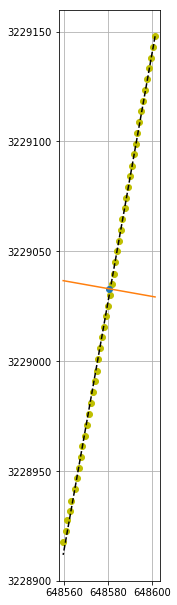

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import atan, degrees


# x of geometry in UTM
x_points = geom2fit.x_UTM.values*1.0
# y of geometry in UTM
y_points = geom2fit.y_UTM.values*1.0

print(x_points)
# center point
center_point = [np.mean(x_points), np.mean(y_points)]
print(center_point)

# center_point_x = np.mean(x_points)
center_point_x = (max(x_points) + min(x_points))/2
# center_point_y = np.mean(y_points)
center_point_y = (max(y_points) + min(y_points))/2

print('center point x,y are :', center_point_x, center_point_y)
# fit of points
fit = np.polyfit(x_points,y_points,1)
m, b = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit)
# print(fit)
print('slope of fit is: ', fit[0])
print('intercept of fit is: ', fit[1])
### perpendicular line passing through the center
print('slope of perpendicular to fit is: ', -1/fit[0])
m_p = (-1/fit[0])

# m_angle = degrees(atan(fit[0]))
# m_p_angle = degrees(atan(m_p))
m_angle = atan(fit[0])
m_p_angle = atan(m_p)
print('slope is: ', m_angle)
print('perpendicular slope is: ', m_p_angle) #in radians
print('check: ', m_angle - m_p_angle) # in radians

# intercept of perpendicular line
b_c = center_point_y -m_p*center_point_x
y_p_points = m_p*x_points + b_c

# set figure sixe
fig = plt.gcf()
fig.set_size_inches(4.5, 10.5)

# perpendicular_fit = ((-1/m)*x_points, y_points)
# points and fit
ax1 = plt.plot(x_points,y_points, 'yo', x_points, fit_fn(x_points), '--k')
# plot center point
ax2 = plt.plot(center_point_x, center_point_y, 'o')
# plot perpendicular line
ax3 = plt.plot(x_points, y_p_points)
# plot perpendicular fit
# plt.plot(x_points,(-1/m)*x_points, 'ro')
plt.grid('on')
plt.axes().set_aspect(1) # it's turned off, but lines are perpendicular, uncomment to check ;)
plt.show

In [12]:
# line azimuth
# see also for a more general case 
# https://github.com/marcoalopez/line_azimuth/blob/master/get_lineazi.py

# Apply transform

slope of perpendicular to fit is:  -0.17720166352501993
delta is:  [-40, -30, -20, -10, 10, 20, 30, 40]
0
-40
48
-30
96
-20


/Users/anrossi/miniconda/envs/python3test/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


144
-10
192
10
240
20
288
30
336
40


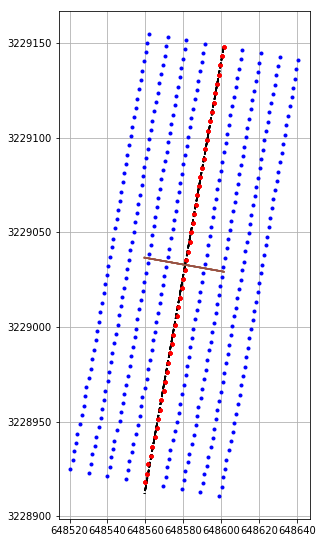

In [13]:
# translate the center point according to the delta_D
from math import sqrt, sin, cos, tan
# from geopandas import GeoDataFrame
import pandas as pd
import geopandas as gpd
# from shapely.geometry import Point
import shapely 

#####
# FROM ABOVE:
### perpendicular line passing through the center
print('slope of perpendicular to fit is: ', -1/fit[0])
m_p = (-1/fit[0])
# intercept of perpendicular line
b_c = center_point_y -m_p*center_point_x
y_p_points = m_p*x_points + b_c
#####
# test, put points at given distance along the perpendicular line

# delta_D = delta_TEST

# create a dataframe 
#                         columns = ['x_UTM','y_UTM']
#                         dictionary_append = []
#                         geom2shift = pd.DataFrame(columns=columns)

'''
# create a dataframe 
columns = ['x_UTM','y_UTM','sPoints','delta_D']
dictionary_append = []
#geom2shift = pd.DataFrame(columns=columns)
#geom2shift.set_geometry('sPoints')
geom2shift = gpd.GeoDataFrame(columns=columns,geometry='sPoints')
print('delta_D is: ',delta_D)
'''


# fix by Mikhail Minin start
# to define the data frame
columns = ['x_UTM','y_UTM','sPoints','delta']
dictionary_append = []
#geom2shift = pd.DataFrame(columns=columns)
#geom2shift.set_geometry('sPoints')
geom2shift = gpd.GeoDataFrame(columns=columns,geometry='sPoints')
# fix by Mikhail Minin stop





# delta = delta_E

print('delta is: ',delta)
j=0
for element in delta:
    print(j)
    print(element)   
    for i in range(len(x_points)):
        y_shift = 0
        x_shift = 0
        x_shift = (element * cos(m_p_angle))
        y_shift = (element * sin(m_p_angle))
        #     print(x_points[0])
        #     print(y_points[0])
        #     print('x_shift is: ',x_shift)
        #     print('y_shift is: ',y_shift)
        x_shifted = x_points + x_shift
        y_shifted = y_points + y_shift
        #     print('x_shifted is: ',x_shifted)
        #     print('y_shifted is: ',y_shifted)
        geom2shift.loc[j+i,'sPoints']=shapely.geometry.point.Point(x_shifted[i],y_shifted[i])
        geom2shift.loc[j+i,'x_UTM']=x_shifted[i]
        geom2shift.loc[j+i,'y_UTM']=y_shifted[i]
        geom2shift.loc[j+i,'delta']=element
    j+=len(x_points)
    # calculate x, y for delta_d elements

    
    # plot each point shifted
    # points and fit
    fig.set_size_inches(4.5, 10.5)
    ax1 = plt.plot(x_points, fit_fn(x_points), '--k')
    fig = plt.gcf()
    ax2 = plt.plot(x_points[24],y_points[24])
    plt.plot(x_shifted,y_shifted, '.', color='blue')
    # plot perpendicular line
    ax3 = plt.plot(x_points, y_points, '.', color='red')
    plt.grid('on')
    plt.axes().set_aspect(1) # it's turned off, but lines are perpendicular, uncomment to check ;)
    
    # plot perpendicular line
    ax3 = plt.plot(x_points, y_p_points)
#     for i in range(len(x_points)):
#         geom2shift.loc[j+i,'sPoints']=shapely.geometry.point.Point(x_points[i],y_p_points[i])
#         geom2shift.loc[j+i,'x_UTM']=x_points[i]
#         geom2shift.loc[j+i,'y_UTM']=y_p_points[i]
#         geom2shift.loc[j+i,'delta_D']=element
#     j+=len(x_points)
    plt.show
    
    # populate the pandas dataframe with new results
#     for geometry in geom2shift.geometry:
#         print(geometry)
# add geometry
    
    # add attributes based on element
    
    # save
    
# # create empty dataframe
# columns = ['x_UTM','y_UTM']
# dictionary_append = []
# geom2fit = pd.DataFrame(columns=columns)
# # print all rows x,y
# # fill a dataframe for each row
# for geometry in gdf.geometry:
#     print(geometry.x)
#     print(geometry.y)
#     dictionary_append.append({'x_UTM':geometry.x, 'y_UTM':geometry.y})
#     geom2fit = geom2fit.append(dictionary_append)
  

In [18]:
geom2shift.columns.values

array(['x_UTM', 'y_UTM', 'sPoints', 'delta'], dtype=object)

# export data as GeoJson / shapefile / excel

In [19]:
# export geopandas as json/shapefile

# outjson = '2_output/test.geojson'
# outjson = '2_output/agpa_D-shifted.geojson'
# outjson = '2_output/agpa_E-shifted.geojson'


with open(outjson, 'w') as f:
    f.write(geom2shift.to_json())

# export to csv

with open(outcsv, 'w') as f:
    f.write(geom2shift.to_csv())
    
# df.to_file('/dev/sdc/Boundary.shp', driver='ESRI Shapefile', crs_wkt=prj)

# and to csv as
# geom2shift.to_csv()

# to convert to shapefile you'd need an appropriate driver installed, but it should look something like

# geom2shift.to_file(driver ='ESRI Shapefile', filename='abc.shp')

# Load raster over the same area

In [ ]:
# TBD

# Pick raster values for each point and add to geopandas

In [119]:
# TO BE ADDED LATER 
# SEE https://github.com/mminin/snippets/blob/master/getElevationAtPoint.py

# visualize materials on leaflet

In [20]:
import mplleaflet

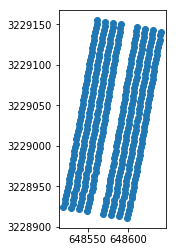

In [21]:
ax = geom2shift.plot()

In [22]:
# +ellps=GRS80 +no_defs +proj=utm +units=m +zone=28
crs_leaflet = {'ellps': 'GRS80',
       'proj': 'utm',
       'units': 'm',
       'zone': '28'}

mplleaflet.display(fig=ax.figure, crs=crs_leaflet)

# Appendix & TBD

raster conversion to UTM GRS80

```
# dtm

gdalwarp -t_srs "+proj=utm +zone=28 +north +ellps=GRS80 \
+datum=GRS80 +units=m +no_defs" \
dtm-lanzarote-wgs84-utm28n.tif dtm-lanzarote-grs80-utm28n.tif

# same for shade relief
```

conversion of geojson to shapefile (table to contain all info on point locations)

```
ogr2ogr -nlt POINT -skipfailures D.shp agpa_D-shifted.geojson OGRGeoJSON

ogr2ogr -nlt POINT -skipfailures E.shp agpa_E-shifted.geojson OGRGeoJSON

```